In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df_cust = pd.read_csv('data/customers.csv')
df_loan = pd.read_csv('data/loans.csv')
df_bureau = pd.read_csv('data/bureau_data.csv')

print(df_cust.shape, df_loan.shape, df_bureau.shape)

(50000, 12) (50000, 15) (50000, 8)


In [4]:
df_cust.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [5]:
df_loan.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [6]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [7]:
df_cust_loan = pd.merge(df_cust, df_loan, on='cust_id', how='inner')

df_cust_loan.head() 

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [8]:
df_all = pd.merge(df_cust_loan, df_bureau, on='cust_id', how='inner')
df_all.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [9]:
df_all.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000
mean,39.550980,2.640898e+06,1.939540,16.018440,419090.860000,4.704828e+06,3.999679e+06,8.049471e+04,7.199422e+05,3.199743e+06,25.940520,1.337636e+06,9.891264e+05,2.500140,1.00106,76.127140,4.87890,26.858000,5.009340,43.36142
std,9.847752,2.629441e+06,1.535517,8.926489,168982.674047,6.267276e+06,5.376552e+06,1.173123e+05,9.677794e+05,4.301242e+06,12.433163,1.214714e+06,1.046072e+06,1.118725,0.81412,43.762469,5.85032,32.832832,2.029122,29.35598
min,18.000000,0.000000e+00,0.000000,1.000000,110001.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,-1.000000e+00,0.000000e+00,1.000000,0.00000,1.000000,0.00000,0.000000,1.000000,0.00000
25%,33.000000,8.030000e+05,0.000000,8.000000,302001.000000,1.147000e+06,9.670000e+05,1.934000e+04,1.740600e+05,7.736000e+05,16.000000,4.247990e+05,2.870075e+05,1.000000,0.00000,42.000000,0.00000,0.000000,4.000000,18.00000
50%,40.000000,1.892000e+06,2.000000,16.000000,400001.000000,2.656000e+06,2.240000e+06,4.480000e+04,4.032000e+05,1.792000e+06,24.000000,1.002309e+06,6.685250e+05,3.000000,1.00000,71.000000,3.00000,14.000000,5.000000,39.00000
75%,46.000000,3.332250e+06,3.000000,24.000000,560001.000000,5.172250e+06,4.611000e+06,9.224000e+04,8.299800e+05,3.688800e+06,35.000000,1.790751e+06,1.238667e+06,4.000000,2.00000,107.000000,9.00000,46.000000,6.000000,67.00000
max,70.000000,1.199900e+07,5.000000,31.000000,700001.000000,5.217500e+07,4.781900e+07,5.698030e+06,8.607420e+06,3.825520e+07,59.000000,5.000000e+06,7.846643e+06,4.000000,2.00000,223.000000,24.00000,171.000000,9.000000,99.00000


In [10]:
df_all.isna().sum() 

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 62
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
default                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_mon

In [11]:
df_all['default'] = df_all['default'].astype('int')

In [12]:
df_all.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,0,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,0,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,0,4,2,120,0,0,5,10


In [13]:
df_all['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [14]:
X = df_all.drop('default', axis=1)
y = df_all['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40000, 32) (10000, 32) (40000,) (10000,)


In [15]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
39087,C39088,29,F,Single,Salaried,779000,2,Owned,2,Lucknow,...,2023-06-20,2023-07-02,3,2,131,0,0,5,92,0
30893,C30894,36,F,Married,Self-Employed,2963000,4,Mortgage,25,Delhi,...,2022-08-25,2022-08-26,3,2,86,11,77,3,53,0
45278,C45279,35,M,Married,Salaried,5629000,3,Owned,27,Chennai,...,2024-02-01,2024-02-23,3,2,66,1,5,3,5,0
16398,C16399,49,M,Married,Self-Employed,4229000,3,Rented,7,Chennai,...,2021-03-14,2021-03-17,2,0,32,0,0,5,16,0
13653,C13654,37,M,Single,Salaried,378000,0,Owned,16,Chennai,...,2020-12-04,2020-12-18,4,1,141,7,46,4,11,0


In [16]:
df_train.residence_type.value_counts()

mode_residence = df_train['residence_type'].mode()[0]
mode_residence

'Owned'

In [17]:
df_train.fillna({'residence_type': mode_residence}, inplace=True)
df_test.fillna({'residence_type': mode_residence}, inplace=True)

In [18]:
df_train.isna().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [19]:
cols_cat = ['gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_purpose',
       'loan_type', 'zipcode', 'default']
cols_cat

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'zipcode',
 'default']

In [20]:
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop(['zipcode'])
num_cols

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio'],
      dtype='object')

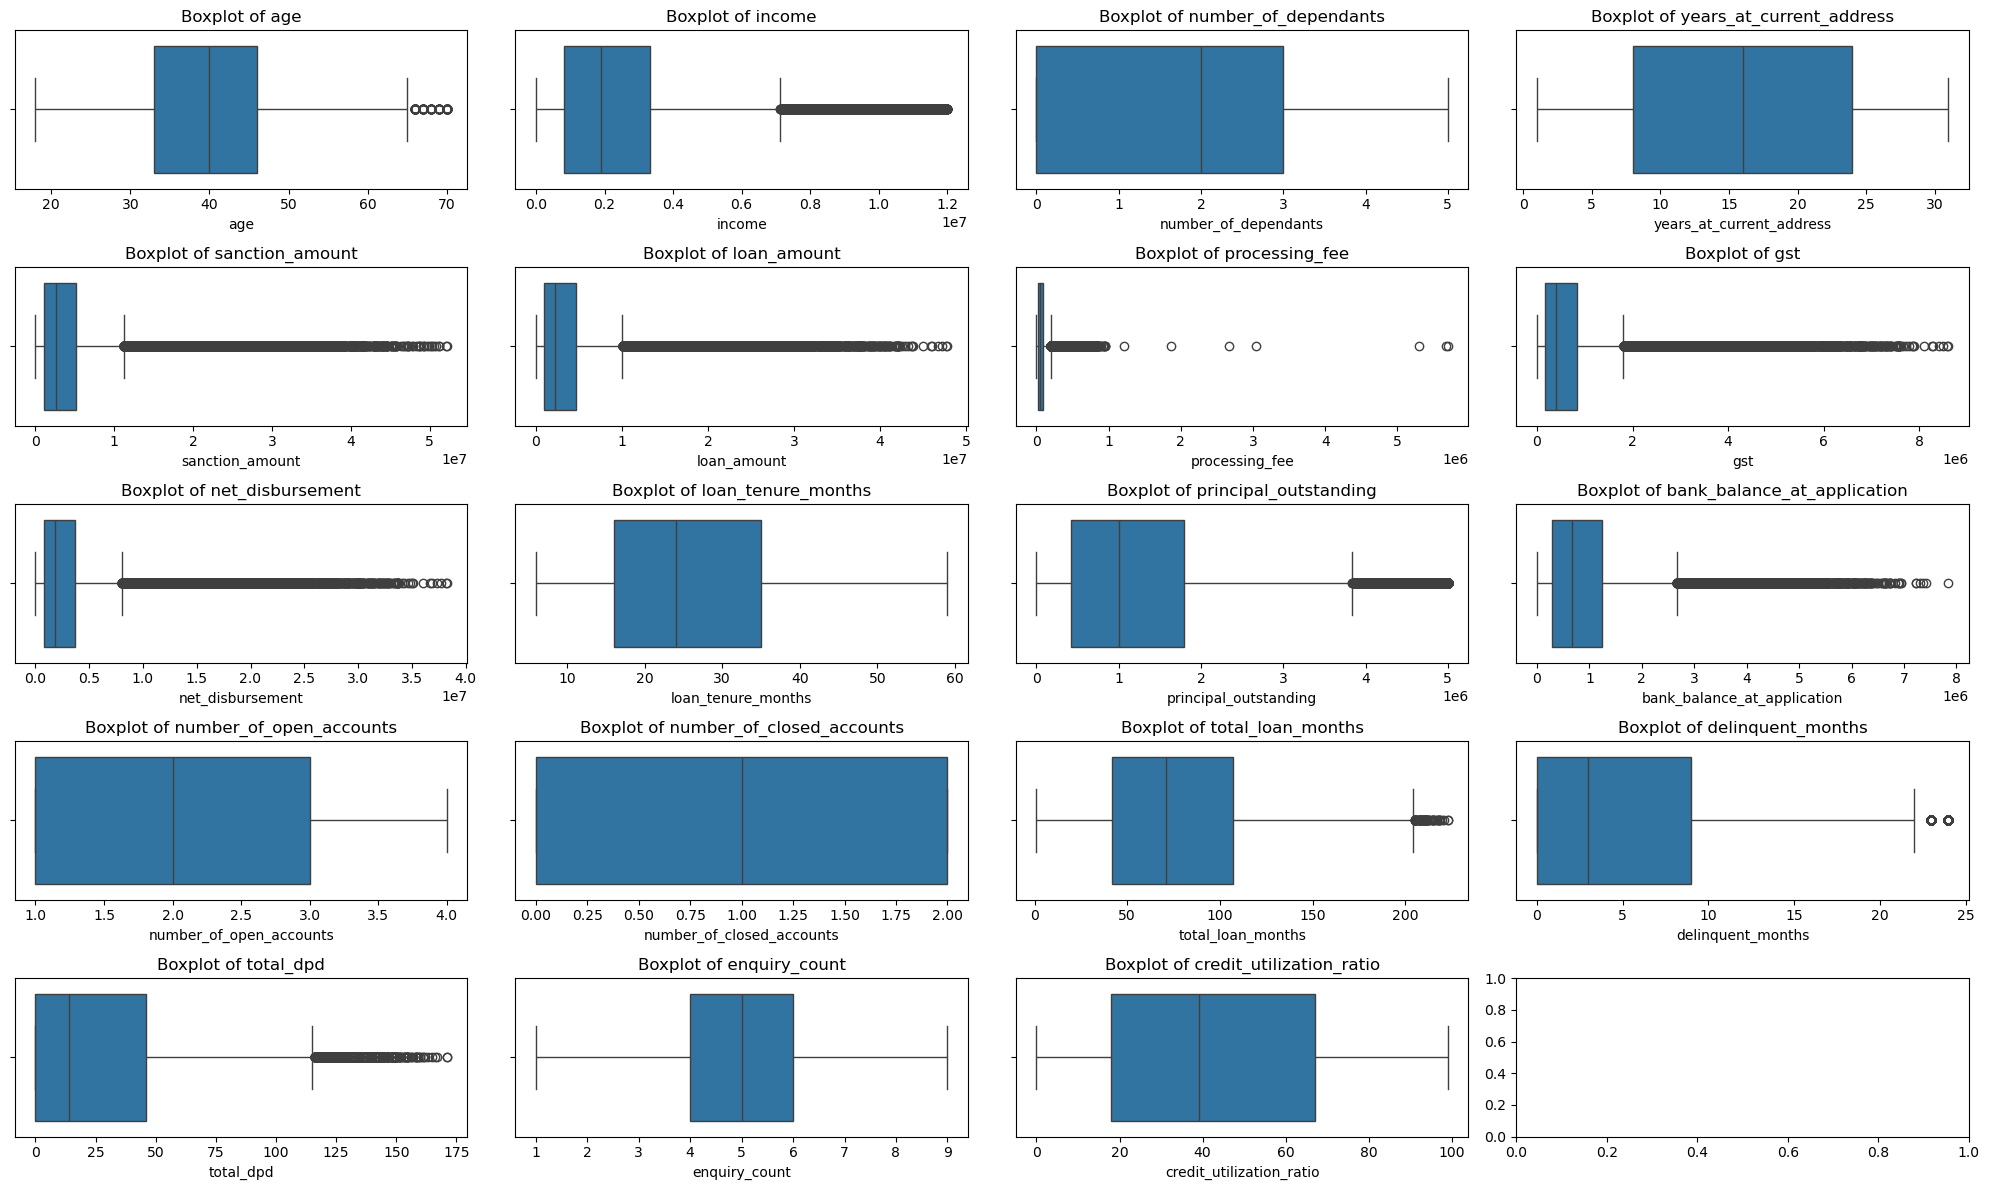

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

# Show first 4 numerical features in a single row of subplots
fig, axes = plt.subplots(5, 4, figsize=(20, 12))
axes = axes.flatten()
for i, feature in enumerate(num_cols):
    sns.boxplot(data=df_train, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

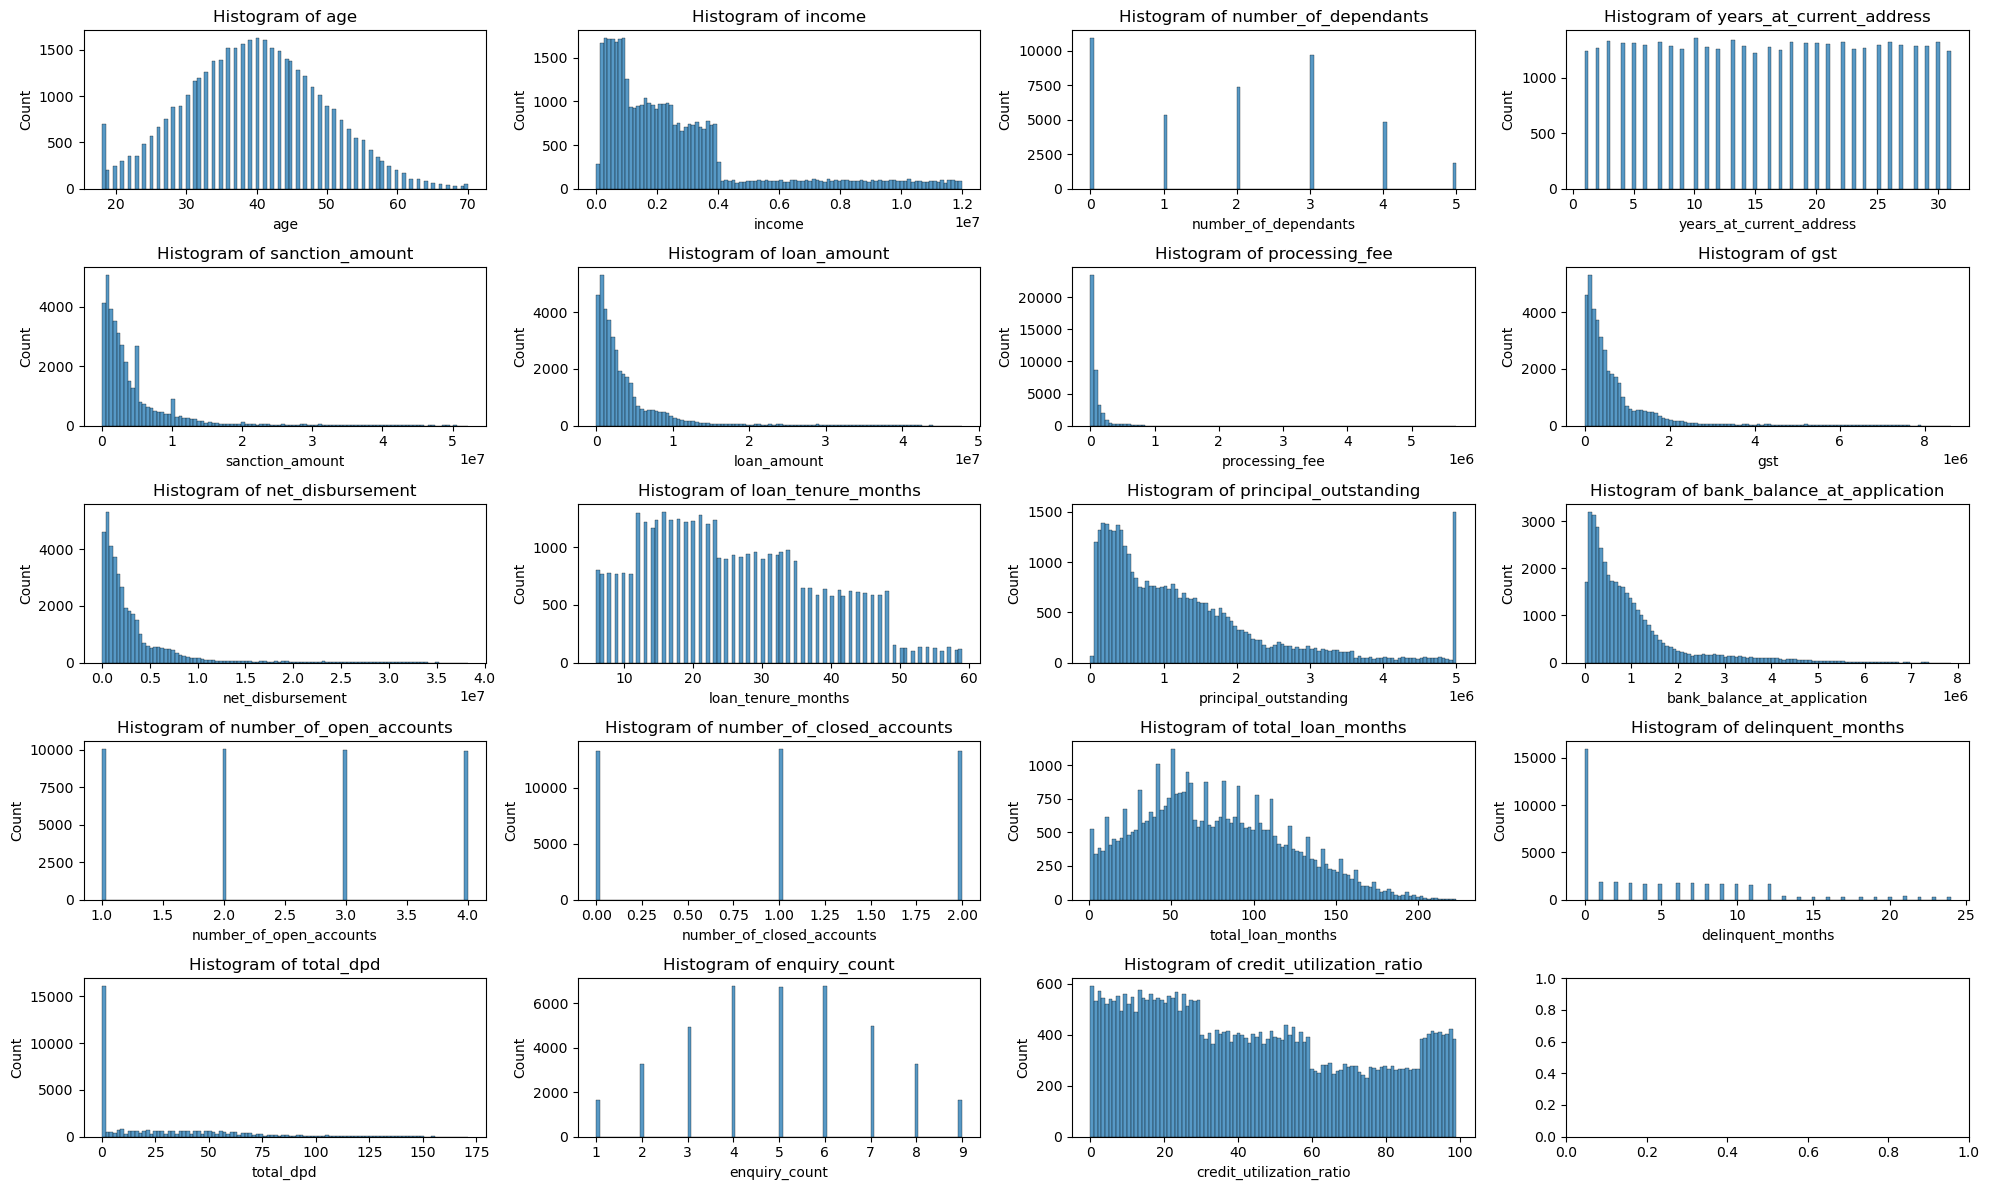

In [22]:
# Show first 4 numerical features in a single row of subplots
fig, axes = plt.subplots(5, 4, figsize=(20, 12))
axes = axes.flatten()
for i, feature in enumerate(num_cols):
    sns.histplot(data=df_train, x=feature, ax=axes[i], bins=100)
    axes[i].set_title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

In [23]:
df_train.processing_fee.describe()

count    4.000000e+04
mean     8.082281e+04
std      1.203019e+05
min      0.000000e+00
25%      1.922000e+04
50%      4.472000e+04
75%      9.206500e+04
max      5.698030e+06
Name: processing_fee, dtype: float64

In [24]:
df_train[df_train.processing_fee > df_train.loan_amount]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
23981,C23982,33,F,Single,Self-Employed,1790000,0,Rented,7,Kolkata,...,2021-12-15,2022-01-14,4,2,154,9,31,6,26,0
9898,C09899,56,M,Married,Self-Employed,8948000,5,Owned,16,Ahmedabad,...,2020-07-19,2020-08-11,2,1,51,1,5,3,92,0
47089,C47090,37,M,Married,Self-Employed,1892000,2,Rented,13,Jaipur,...,2024-04-07,2024-04-15,3,0,112,5,33,3,32,0
33705,C33706,54,M,Married,Self-Employed,10763000,2,Mortgage,5,Ahmedabad,...,2022-12-05,2022-12-30,3,1,140,0,0,5,47,0
12294,C12295,49,M,Married,Salaried,3504000,2,Rented,24,Ahmedabad,...,2020-10-15,2020-10-23,1,2,58,0,0,3,86,0
28174,C28175,36,F,Single,Self-Employed,1123000,1,Rented,31,Hyderabad,...,2022-05-18,2022-06-05,3,0,111,8,41,3,62,0
29305,C29306,52,M,Married,Self-Employed,3839000,2,Owned,11,Delhi,...,2022-06-28,2022-07-21,2,2,42,11,65,3,2,0


In [25]:
df_train[df_train.processing_fee > df_train.loan_amount*0.03]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
23981,C23982,33,F,Single,Self-Employed,1790000,0,Rented,7,Kolkata,...,2021-12-15,2022-01-14,4,2,154,9,31,6,26,0
9898,C09899,56,M,Married,Self-Employed,8948000,5,Owned,16,Ahmedabad,...,2020-07-19,2020-08-11,2,1,51,1,5,3,92,0
47089,C47090,37,M,Married,Self-Employed,1892000,2,Rented,13,Jaipur,...,2024-04-07,2024-04-15,3,0,112,5,33,3,32,0
33705,C33706,54,M,Married,Self-Employed,10763000,2,Mortgage,5,Ahmedabad,...,2022-12-05,2022-12-30,3,1,140,0,0,5,47,0
12294,C12295,49,M,Married,Salaried,3504000,2,Rented,24,Ahmedabad,...,2020-10-15,2020-10-23,1,2,58,0,0,3,86,0
28174,C28175,36,F,Single,Self-Employed,1123000,1,Rented,31,Hyderabad,...,2022-05-18,2022-06-05,3,0,111,8,41,3,62,0
29305,C29306,52,M,Married,Self-Employed,3839000,2,Owned,11,Delhi,...,2022-06-28,2022-07-21,2,2,42,11,65,3,2,0


In [26]:
df_train1 = df_train[df_train.processing_fee <= df_train.loan_amount*0.03].copy()
df_train1.processing_fee.describe()

count     39993.000000
mean      80200.614608
std      108285.128500
min           0.000000
25%       19220.000000
50%       44700.000000
75%       92040.000000
max      956380.000000
Name: processing_fee, dtype: float64

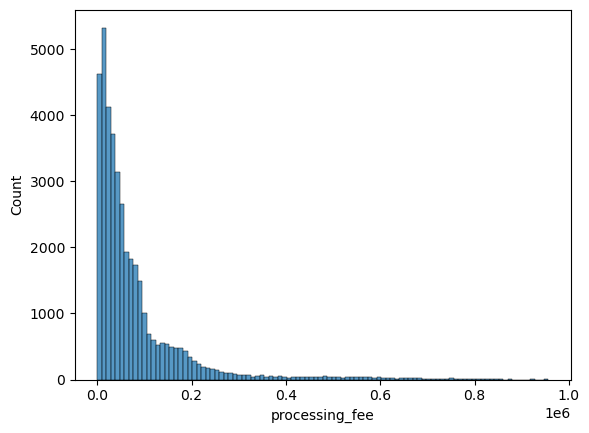

In [27]:
sns.histplot(data=df_train1, x='processing_fee', bins=100)
plt.show()

In [28]:
df_test1 = df_test[df_test.processing_fee <= df_test.loan_amount*0.03].copy()
df_test1.processing_fee.describe()

count     10000.000000
mean      79182.300000
std      104497.064834
min           0.000000
25%       19760.000000
50%       45060.000000
75%       93055.000000
max      931560.000000
Name: processing_fee, dtype: float64

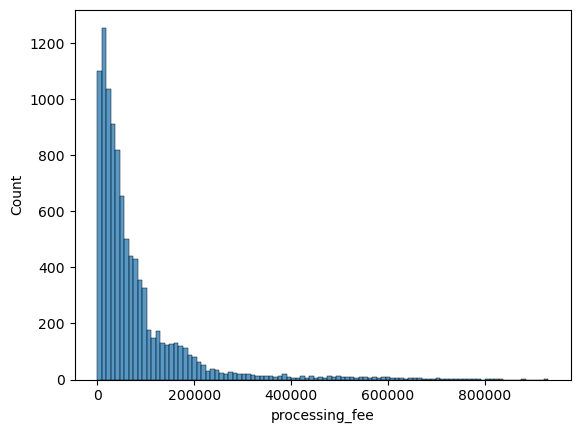

In [29]:
sns.histplot(data=df_test1, x='processing_fee', bins=100)
plt.show()

In [30]:
for col in cols_cat:
    print(f'{col} unique values: {df_train1[col].unique()}')

gender unique values: ['F' 'M']
marital_status unique values: ['Single' 'Married']
employment_status unique values: ['Salaried' 'Self-Employed']
residence_type unique values: ['Owned' 'Mortgage' 'Rented']
city unique values: ['Lucknow' 'Delhi' 'Chennai' 'Jaipur' 'Pune' 'Bangalore' 'Kolkata'
 'Hyderabad' 'Mumbai' 'Ahmedabad']
state unique values: ['Uttar Pradesh' 'Delhi' 'Tamil Nadu' 'Rajasthan' 'Maharashtra'
 'Karnataka' 'West Bengal' 'Telangana' 'Gujarat']
loan_purpose unique values: ['Personal' 'Home' 'Education' 'Auto' 'Personaal']
loan_type unique values: ['Unsecured' 'Secured']
zipcode unique values: [226001 110001 600001 302001 411001 560001 700001 500001 400001 380001]
default unique values: [0 1]


In [31]:
df_train1['loan_purpose'] = df_train1['loan_purpose'].map({'Personaal': 'Personal', 'Personal': 'Personal', 'Home': 'Home', 'Education': 'Education', 'Auto': 'Auto'})
df_train1.loan_purpose.unique()

array(['Personal', 'Home', 'Education', 'Auto'], dtype=object)

In [32]:
df_test1['loan_purpose'] = df_test1['loan_purpose'].map({'Personaal': 'Personal', 'Personal': 'Personal', 'Home': 'Home', 'Education': 'Education', 'Auto': 'Auto'})


In [33]:
df_train1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
39087,C39088,29,F,Single,Salaried,779000,2,Owned,2,Lucknow,...,2023-06-20,2023-07-02,3,2,131,0,0,5,92,0
30893,C30894,36,F,Married,Self-Employed,2963000,4,Mortgage,25,Delhi,...,2022-08-25,2022-08-26,3,2,86,11,77,3,53,0
45278,C45279,35,M,Married,Salaried,5629000,3,Owned,27,Chennai,...,2024-02-01,2024-02-23,3,2,66,1,5,3,5,0
16398,C16399,49,M,Married,Self-Employed,4229000,3,Rented,7,Chennai,...,2021-03-14,2021-03-17,2,0,32,0,0,5,16,0
13653,C13654,37,M,Single,Salaried,378000,0,Owned,16,Chennai,...,2020-12-04,2020-12-18,4,1,141,7,46,4,11,0


<h3> Exploratory Data Analysis </h3>

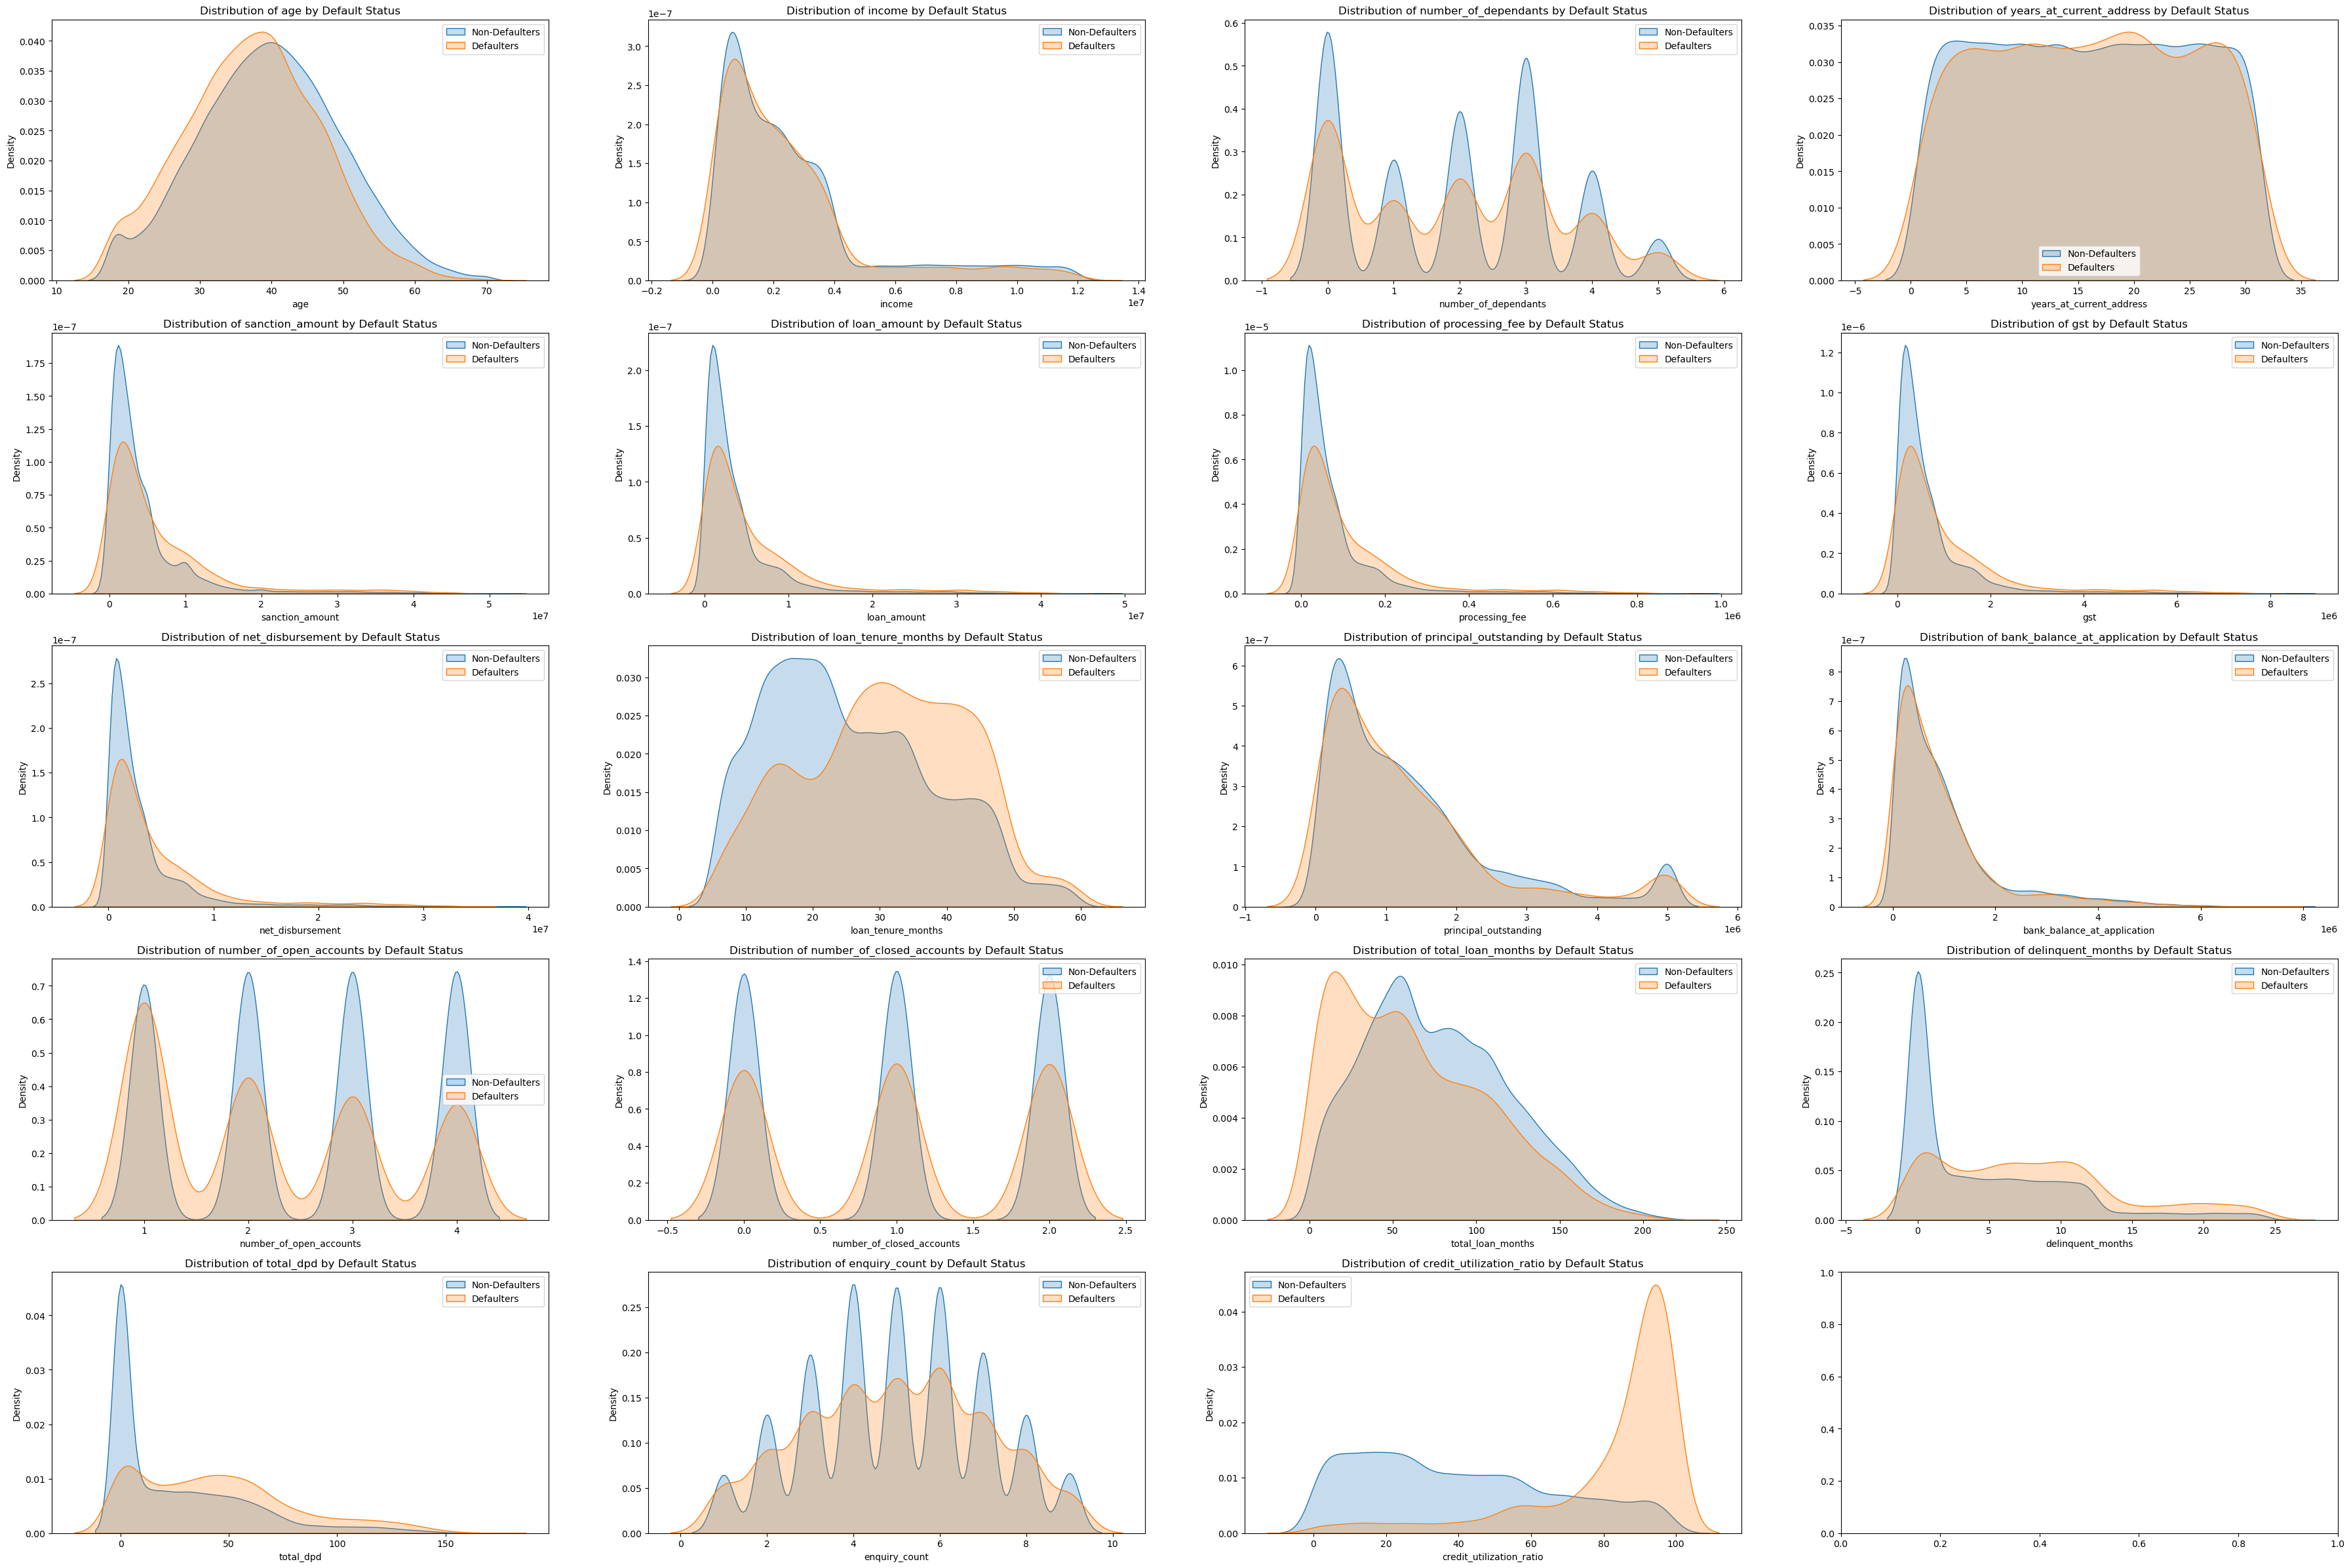

In [34]:
fig, axes = plt.subplots(5, 4, figsize=(45, 30))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df_train1[df_train1['default'] == 0], x=col, label = 'Non-Defaulters', fill=True, ax=axes[i])
    sns.kdeplot(data=df_train1[df_train1['default'] == 1], x=col, label = 'Defaulters', fill=True, ax=axes[i])
    axes[i].legend()
    axes[i].set_title(f'Distribution of {col} by Default Status')

plt.show()

Major Features impacting default status are:
1. Age (Younger people tend to default more)
2. Loan_Tenure_Months (More months leads to more likelihood of default)
3. total_loan_months (if total_loan_months are less, it could default more)
4. credit_utilization (if credit_utilization is more, those loans tend to default more)
5. total_dpd and delinquent_months (defaulted loans have greater values for these features)

In [35]:
df_train1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
39087,C39088,29,F,Single,Salaried,779000,2,Owned,2,Lucknow,...,2023-06-20,2023-07-02,3,2,131,0,0,5,92,0
30893,C30894,36,F,Married,Self-Employed,2963000,4,Mortgage,25,Delhi,...,2022-08-25,2022-08-26,3,2,86,11,77,3,53,0
45278,C45279,35,M,Married,Salaried,5629000,3,Owned,27,Chennai,...,2024-02-01,2024-02-23,3,2,66,1,5,3,5,0
16398,C16399,49,M,Married,Self-Employed,4229000,3,Rented,7,Chennai,...,2021-03-14,2021-03-17,2,0,32,0,0,5,16,0
13653,C13654,37,M,Single,Salaried,378000,0,Owned,16,Chennai,...,2020-12-04,2020-12-18,4,1,141,7,46,4,11,0


In [36]:
df_train1['loan_to_income_ratio'] = df_train1.apply(lambda row: round(row['loan_amount'] / row['income'],2) if row['income'] != 0 else 0, axis=1)
df_train1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income_ratio
39087,C39088,29,F,Single,Salaried,779000,2,Owned,2,Lucknow,...,2023-07-02,3,2,131,0,0,5,92,0,0.88
30893,C30894,36,F,Married,Self-Employed,2963000,4,Mortgage,25,Delhi,...,2022-08-26,3,2,86,11,77,3,53,0,3.47
45278,C45279,35,M,Married,Salaried,5629000,3,Owned,27,Chennai,...,2024-02-23,3,2,66,1,5,3,5,0,2.87
16398,C16399,49,M,Married,Self-Employed,4229000,3,Rented,7,Chennai,...,2021-03-17,2,0,32,0,0,5,16,0,0.65
13653,C13654,37,M,Single,Salaried,378000,0,Owned,16,Chennai,...,2020-12-18,4,1,141,7,46,4,11,0,1.72


In [37]:
df_train1[['loan_to_income_ratio','loan_amount', 'income']].loc[2278]

loan_to_income_ratio    0.0
loan_amount             0.0
income                  0.0
Name: 2278, dtype: float64

Text(0.5, 1.0, 'Distribution of loan_to_income_ratio by Default Status')

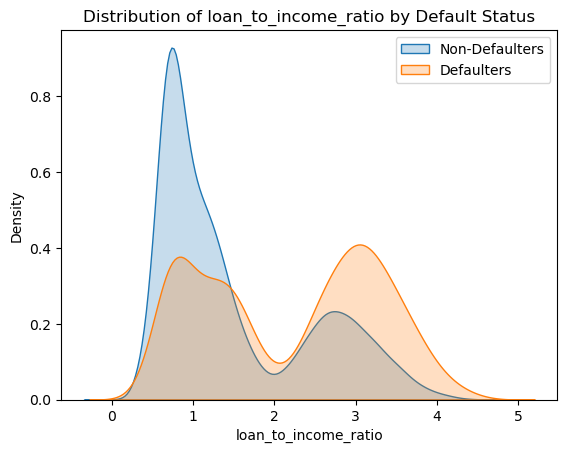

In [38]:
sns.kdeplot(data=df_train1[df_train1['default'] == 0], x='loan_to_income_ratio', label = 'Non-Defaulters', fill=True)
sns.kdeplot(data=df_train1[df_train1['default'] == 1], x='loan_to_income_ratio', label = 'Defaulters', fill=True)
plt.legend()
plt.title('Distribution of loan_to_income_ratio by Default Status')

In [39]:
df_train1['del_months_loan_ratio'] = (df_train1['delinquent_months']*100/df_train1['total_loan_months']).round(2)
df_train1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income_ratio,del_months_loan_ratio
39087,C39088,29,F,Single,Salaried,779000,2,Owned,2,Lucknow,...,3,2,131,0,0,5,92,0,0.88,0.00
30893,C30894,36,F,Married,Self-Employed,2963000,4,Mortgage,25,Delhi,...,3,2,86,11,77,3,53,0,3.47,12.79
45278,C45279,35,M,Married,Salaried,5629000,3,Owned,27,Chennai,...,3,2,66,1,5,3,5,0,2.87,1.52
16398,C16399,49,M,Married,Self-Employed,4229000,3,Rented,7,Chennai,...,2,0,32,0,0,5,16,0,0.65,0.00
13653,C13654,37,M,Single,Salaried,378000,0,Owned,16,Chennai,...,4,1,141,7,46,4,11,0,1.72,4.96


Text(0.5, 1.0, 'Distribution of del_months_loan_ratio by Default Status')

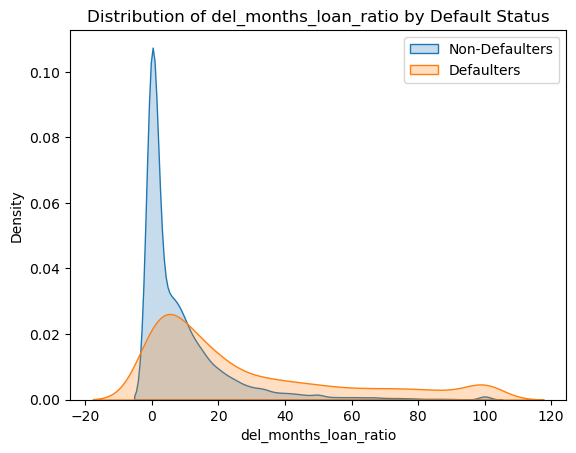

In [40]:
sns.kdeplot(data=df_train1[df_train1['default'] == 0], x='del_months_loan_ratio', label = 'Non-Defaulters', fill=True)
sns.kdeplot(data=df_train1[df_train1['default'] == 1], x='del_months_loan_ratio', label = 'Defaulters', fill=True)
plt.legend()
plt.title('Distribution of del_months_loan_ratio by Default Status')

In [41]:
df_train1['avg_dpd'] = df_train1.apply(lambda row: round(row['total_dpd'] / row['delinquent_months'],2) if row['delinquent_months'] != 0 else 0, axis=1)
df_train1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income_ratio,del_months_loan_ratio,avg_dpd
39087,C39088,29,F,Single,Salaried,779000,2,Owned,2,Lucknow,...,2,131,0,0,5,92,0,0.88,0.00,0.00
30893,C30894,36,F,Married,Self-Employed,2963000,4,Mortgage,25,Delhi,...,2,86,11,77,3,53,0,3.47,12.79,7.00
45278,C45279,35,M,Married,Salaried,5629000,3,Owned,27,Chennai,...,2,66,1,5,3,5,0,2.87,1.52,5.00
16398,C16399,49,M,Married,Self-Employed,4229000,3,Rented,7,Chennai,...,0,32,0,0,5,16,0,0.65,0.00,0.00
13653,C13654,37,M,Single,Salaried,378000,0,Owned,16,Chennai,...,1,141,7,46,4,11,0,1.72,4.96,6.57


Text(0.5, 1.0, 'Distribution of avg_dpd by Default Status')

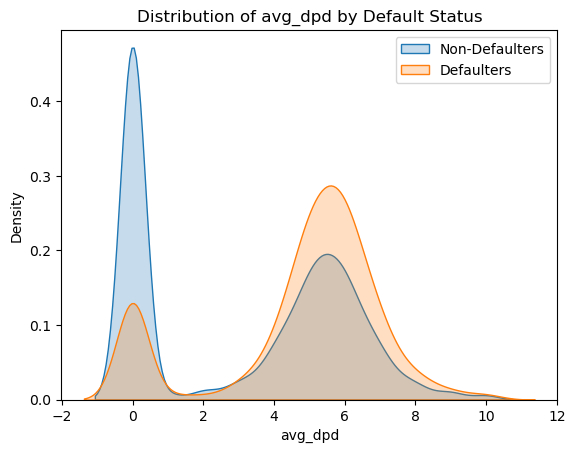

In [42]:
sns.kdeplot(data=df_train1[df_train1['default'] == 0], x='avg_dpd', label = 'Non-Defaulters', fill=True)
sns.kdeplot(data=df_train1[df_train1['default'] == 1], x='avg_dpd', label = 'Defaulters', fill=True)
plt.legend()
plt.title('Distribution of avg_dpd by Default Status')

In [43]:
df_test1['loan_to_income_ratio'] = df_test1.apply(lambda row: round(row['loan_amount'] / row['income'],2) if row['income'] != 0 else 0, axis=1)
df_test1['del_months_loan_ratio'] = (df_test1['delinquent_months']*100/df_test1['total_loan_months']).round(2)
df_test1['avg_dpd'] = df_test1.apply(lambda row: round(row['total_dpd'] / row['delinquent_months'],2) if row['delinquent_months'] != 0 else 0, axis=1)
df_test1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income_ratio,del_months_loan_ratio,avg_dpd
33553,C33554,36,F,Married,Self-Employed,3373000,3,Owned,15,Hyderabad,...,2,70,3,27,5,12,0,1.40,4.29,9.00
9427,C09428,33,F,Single,Salaried,2725000,0,Owned,15,Jaipur,...,0,115,0,0,9,85,0,3.24,0.00,0.00
199,C00200,28,M,Single,Self-Employed,1071000,0,Owned,19,Delhi,...,1,144,0,0,4,72,0,3.01,0.00,0.00
12447,C12448,28,M,Married,Salaried,1183000,3,Rented,4,Delhi,...,2,93,0,0,4,90,0,1.10,0.00,0.00
39489,C39490,52,M,Married,Self-Employed,2079000,2,Owned,26,Pune,...,2,152,20,105,9,53,0,1.02,13.16,5.25


In [44]:
df_train1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income_ratio', 'del_months_loan_ratio', 'avg_dpd'],
      dtype='object')

In [45]:
df_train1.drop(['cust_id', 'loan_id', 'income', 'delinquent_months', 
                'total_dpd', 'disbursal_date', 'installment_start_dt', 'loan_amount', 'total_loan_months'], axis=1, inplace=True)

df_test1.drop(['cust_id', 'loan_id', 'income', 'delinquent_months', 
                'total_dpd', 'disbursal_date', 'installment_start_dt', 'loan_amount', 'total_loan_months'], axis=1, inplace=True)

In [46]:
df_train1.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'del_months_loan_ratio', 'avg_dpd'],
      dtype='object')

Calculate VIF

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

In [48]:
num_cols = df_train1.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'del_months_loan_ratio', 'avg_dpd'],
      dtype='object')

In [49]:
X_train = df_train1.drop('default', axis=1)
y_train = df_train1['default']

In [50]:
num_cols = num_cols.drop(['zipcode'])
num_cols

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'del_months_loan_ratio', 'avg_dpd'],
      dtype='object')

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income_ratio,del_months_loan_ratio,avg_dpd
39087,0.211538,F,Single,Salaried,0.4,Owned,0.033333,Lucknow,Uttar Pradesh,226001,...,0.283019,0.097794,0.028385,0.666667,1.0,0.500,0.929293,0.192560,0.0000,0.000
30893,0.346154,F,Married,Self-Employed,0.8,Mortgage,0.800000,Delhi,Delhi,110001,...,0.452830,0.332687,0.158791,0.666667,1.0,0.250,0.535354,0.759300,0.1279,0.700
45278,0.326923,M,Married,Salaried,0.6,Owned,0.866667,Chennai,Tamil Nadu,600001,...,0.433962,0.595778,0.172329,0.666667,1.0,0.250,0.050505,0.628009,0.0152,0.500
16398,0.596154,M,Married,Self-Employed,0.6,Rented,0.200000,Chennai,Tamil Nadu,600001,...,0.207547,0.397728,0.208628,0.333333,0.0,0.500,0.161616,0.142232,0.0000,0.000
13653,0.365385,M,Single,Salaried,0.0,Owned,0.500000,Chennai,Tamil Nadu,600001,...,0.584906,0.042318,0.016338,1.000000,0.5,0.375,0.111111,0.376368,0.0496,0.657


In [52]:
X_test = df_test1.drop('default', axis=1)
y_test = df_test1['default']

X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

df_train1[num_cols] = scaler.transform(df_train1[num_cols])
df_test1[num_cols] = scaler.transform(df_test1[num_cols])

In [53]:
vif = calculate_vif(X_train[num_cols])
print(vif)

c:\Users\shivangigupta\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                        feature         VIF
0                           age    5.595223
1          number_of_dependants    2.724594
2      years_at_current_address    3.393070
3               sanction_amount  102.441058
4                processing_fee         inf
5                           gst         inf
6              net_disbursement         inf
7            loan_tenure_months    6.185774
8         principal_outstanding   16.677407
9   bank_balance_at_application    9.444270
10      number_of_open_accounts    4.355975
11    number_of_closed_accounts    2.363570
12                enquiry_count    6.354246
13     credit_utilization_ratio    2.907957
14         loan_to_income_ratio    8.495572
15        del_months_loan_ratio    1.945755
16                      avg_dpd    2.931751


In [54]:
vif_df = calculate_vif(X_train[num_cols].drop(['sanction_amount','principal_outstanding','processing_fee','gst'], axis=1))
vif_df


,feature,VIF
0,age,5.296690
1,number_of_dependants,2.723843
2,years_at_current_address,3.388431
3,net_disbursement,4.553582
4,loan_tenure_months,6.035924
5,bank_balance_at_application,4.123652
6,number_of_open_accounts,4.323346
7,number_of_closed_accounts,2.352881
8,enquiry_count,6.347838
9,credit_utilization_ratio,2.904939


In [55]:
X_train.drop(['sanction_amount','principal_outstanding','processing_fee','gst'], axis=1, inplace=True)

In [56]:
df_train1.drop(['sanction_amount','principal_outstanding','processing_fee','gst'], axis=1, inplace=True)

In [57]:
selected_features_vif = vif_df.feature.values
selected_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'net_disbursement', 'loan_tenure_months',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'del_months_loan_ratio', 'avg_dpd'], dtype=object)

In [58]:
df_train1.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,default,loan_to_income_ratio,del_months_loan_ratio,avg_dpd
39087,0.211538,F,Single,Salaried,0.4,Owned,0.033333,Lucknow,Uttar Pradesh,226001,...,0.283019,0.028385,0.666667,1.0,0.500,0.929293,0,0.192560,0.0000,0.000
30893,0.346154,F,Married,Self-Employed,0.8,Mortgage,0.800000,Delhi,Delhi,110001,...,0.452830,0.158791,0.666667,1.0,0.250,0.535354,0,0.759300,0.1279,0.700
45278,0.326923,M,Married,Salaried,0.6,Owned,0.866667,Chennai,Tamil Nadu,600001,...,0.433962,0.172329,0.666667,1.0,0.250,0.050505,0,0.628009,0.0152,0.500
16398,0.596154,M,Married,Self-Employed,0.6,Rented,0.200000,Chennai,Tamil Nadu,600001,...,0.207547,0.208628,0.333333,0.0,0.500,0.161616,0,0.142232,0.0000,0.000
13653,0.365385,M,Single,Salaried,0.0,Owned,0.500000,Chennai,Tamil Nadu,600001,...,0.584906,0.016338,1.000000,0.5,0.375,0.111111,0,0.376368,0.0496,0.657


In [59]:
num_cols_final = df_train1.select_dtypes(include=['int64', 'float64']).columns
num_cols_final

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'net_disbursement', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'del_months_loan_ratio', 'avg_dpd'],
      dtype='object')

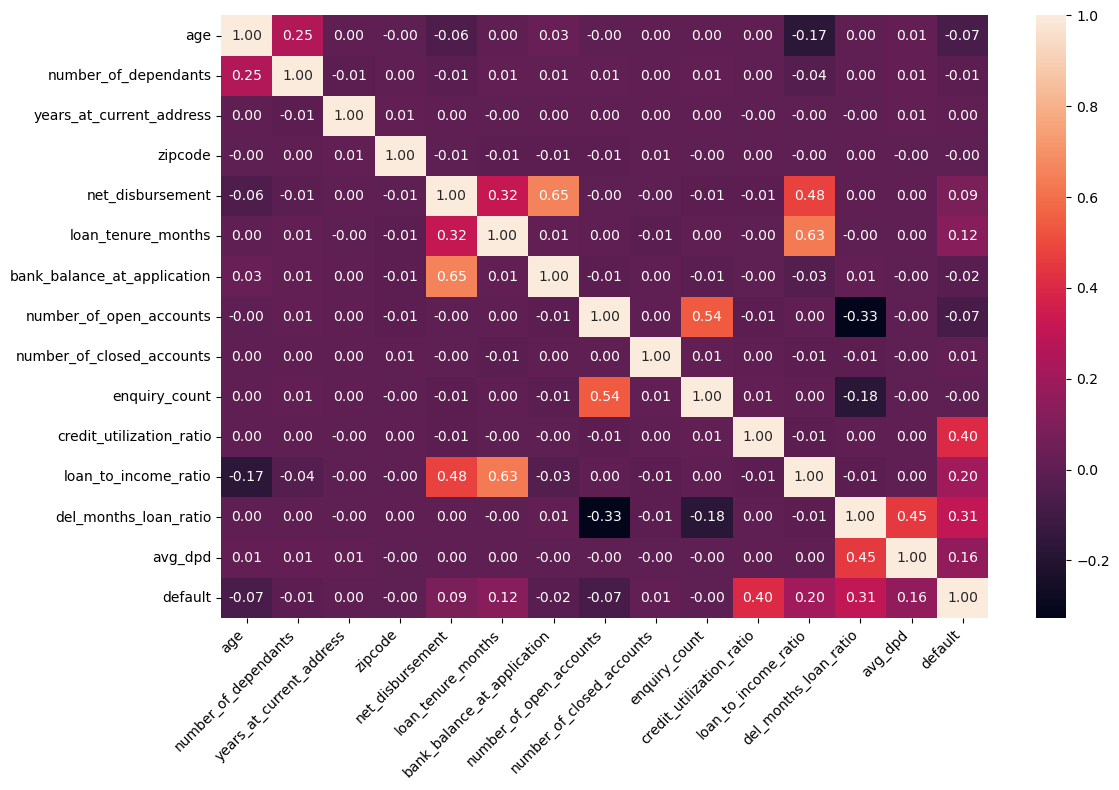

In [60]:
plt.figure(figsize=(12, 8))
cm = df_train1[num_cols_final.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [61]:
cols_cat = [col for col in cols_cat if col != 'default']
cols_cat

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'zipcode']

In [62]:
import numpy as np

def cal_woe_iv(df, feature, target):
    rows = []
    categories = df[feature].unique()
    for cat in categories:
        total = len(df[df[feature] == cat])
        good = len(df[(df[feature] == cat) & (df[target] == 1)])
        bad = len(df[(df[feature] == cat) & (df[target] == 0)])
        dist_good = good / len(df[df[target] == 1]) if len(df[df[target] == 1]) > 0 else 0
        dist_bad = bad / len(df[df[target] == 0]) if len(df[df[target] == 0]) > 0 else 0
        woe = np.log((dist_good) / (dist_bad)) if dist_bad > 0 and dist_good > 0 else 0
        iv = (dist_good - dist_bad) * woe
        rows.append({
            'Feature': feature,
            'Category': cat,
            'Total': total,
            'good': good,
            'bad': bad,
            'dist_good': dist_good,
            'dist_bad': dist_bad,
            'WOE': woe,
            'IV': iv
        })
    return rows

In [63]:
# Combine WOE/IV results for all features into a single DataFrame
df_iv = pd.DataFrame()
X_binned = df_train1.copy()
for feature in X_train.columns:
    if feature in cols_cat:
        iv_rows = cal_woe_iv(df_train1, feature, 'default')
    else:
        X_binned[feature] = pd.cut(df_train1[feature], bins=10, labels= False)
        iv_rows = cal_woe_iv(X_binned, feature, 'default')
    df_iv = pd.concat([df_iv, pd.DataFrame(iv_rows)], ignore_index=True)
df_iv

,Feature,Category,Total,good,bad,dist_good,dist_bad,WOE,IV
0,age,2,5519,547,4972,0.159197,0.136007,0.157436,0.003651
1,age,3,7369,688,6681,0.200233,0.182756,0.091331,0.001596
2,age,5,7381,568,6813,0.165308,0.186366,-0.119902,0.002525
3,age,8,645,28,617,0.008149,0.016878,-0.728100,0.006355
4,age,4,7844,671,7173,0.195285,0.196214,-0.004745,0.000004
...,...,...,...,...,...,...,...,...,...
151,avg_dpd,3,1850,175,1675,0.050931,0.045819,0.105782,0.000541
152,avg_dpd,1,363,22,341,0.006403,0.009328,-0.376275,0.001101
153,avg_dpd,2,694,52,642,0.015134,0.017562,-0.148780,0.000361
154,avg_dpd,8,525,72,453,0.020955,0.012392,0.525339,0.004498


In [64]:
## Total IV per feature

grouped = df_iv.groupby('Feature')['IV'].sum().reset_index()
grouped

,Feature,IV
0,age,0.076677
1,avg_dpd,0.407794
2,bank_balance_at_application,0.005151
3,city,0.000632
4,credit_utilization_ratio,2.426609
5,del_months_loan_ratio,0.678166
6,employment_status,0.002496
7,enquiry_count,0.005564
8,gender,0.000524
9,loan_purpose,0.387176


In [65]:
selected_featured_iv = grouped[grouped['IV'] > 0.02]['Feature'].values
selected_featured_iv

array(['age', 'avg_dpd', 'credit_utilization_ratio',
       'del_months_loan_ratio', 'loan_purpose', 'loan_tenure_months',
       'loan_to_income_ratio', 'loan_type', 'net_disbursement',
       'number_of_open_accounts', 'residence_type'], dtype=object)

### Feature Encoding

In [66]:
df_train2 = df_train1[selected_featured_iv]

In [67]:
df_train2['loan_purpose'].unique()

array(['Personal', 'Home', 'Education', 'Auto'], dtype=object)

In [68]:
df_test1  = df_test1[selected_featured_iv]

In [69]:
X_train_reduced = df_train2
X_test_reduced = df_test1

In [70]:
X_train_reduced = pd.get_dummies(X_train_reduced, columns=['loan_purpose','loan_type','residence_type'], drop_first=True, dtype=int)
X_train_reduced.head()

,age,avg_dpd,credit_utilization_ratio,del_months_loan_ratio,loan_tenure_months,loan_to_income_ratio,net_disbursement,number_of_open_accounts,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured,residence_type_Owned,residence_type_Rented
39087,0.211538,0.000,0.929293,0.0000,0.283019,0.192560,0.014367,0.666667,0,0,1,1,1,0
30893,0.346154,0.700,0.535354,0.1279,0.452830,0.759300,0.214852,0.666667,0,1,0,0,0,0
45278,0.326923,0.500,0.050505,0.0152,0.433962,0.628009,0.337627,0.666667,0,1,0,0,1,0
16398,0.596154,0.000,0.161616,0.0000,0.207547,0.142232,0.057759,0.333333,0,0,1,1,0,1
13653,0.365385,0.657,0.111111,0.0496,0.584906,0.376368,0.013635,1.000000,1,0,0,0,1,0


In [71]:
X_test_reduced = pd.get_dummies(X_test_reduced, columns=['loan_purpose','loan_type','residence_type'], drop_first=True, dtype=int)
X_test_reduced.head()

,age,avg_dpd,credit_utilization_ratio,del_months_loan_ratio,loan_tenure_months,loan_to_income_ratio,net_disbursement,number_of_open_accounts,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured,residence_type_Owned,residence_type_Rented
33553,0.346154,0.900,0.121212,0.0429,0.528302,0.306346,0.098580,0.333333,1,0,0,0,1,0
9427,0.288462,0.000,0.858586,0.0000,0.622642,0.708972,0.184655,1.000000,0,1,0,0,1,0
199,0.192308,0.000,0.727273,0.0000,0.622642,0.658643,0.067525,1.000000,0,1,0,0,1,0
12447,0.192308,0.000,0.909091,0.0000,0.188679,0.240700,0.027186,0.666667,0,0,0,0,0,1
39489,0.653846,0.525,0.535354,0.1316,0.377358,0.223195,0.044292,1.000000,0,0,0,0,1,0


## Train Logistic Regression Model

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train_reduced, y_train)
y_pred = model.predict(X_test_reduced)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9139
           1       0.83      0.72      0.77       861

    accuracy                           0.96     10000
   macro avg       0.90      0.85      0.88     10000
weighted avg       0.96      0.96      0.96     10000



## Train RandomForestClassifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_reduced, y_train)
y_pred = model.predict(X_test_reduced)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9139
           1       0.84      0.71      0.77       861

    accuracy                           0.96     10000
   macro avg       0.90      0.85      0.87     10000
weighted avg       0.96      0.96      0.96     10000



## Train XGBoost 

In [74]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_reduced, y_train)
y_pred = model.predict(X_test_reduced)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9139
           1       0.81      0.76      0.78       861

    accuracy                           0.96     10000
   macro avg       0.89      0.87      0.88     10000
weighted avg       0.96      0.96      0.96     10000



In [75]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']
}

random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, random_state=42)
random_search.fit(X_train_reduced, y_train)

best_model = random_search.best_estimator_

print(f'Best Parameters: {random_search.best_params_}')
print(f'Best score: {random_search.best_score_}')

y_pred = random_search.predict(X_test_reduced)
report = classification_report(y_test, y_pred)
print(report)

Best Parameters: {'solver': 'newton-cg', 'C': 10}
Best score: 0.9620183674497197
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9139
           1       0.81      0.74      0.77       861

    accuracy                           0.96     10000
   macro avg       0.89      0.86      0.88     10000
weighted avg       0.96      0.96      0.96     10000



In [76]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 0.5, 1, 2],
    'scale_pos_weight': [1, 2, 5, 10]
}

random_search = RandomizedSearchCV(XGBClassifier(), param_distributions=param_dist, n_iter=20, scoring='accuracy', cv=5, random_state=42)
random_search.fit(X_train_reduced, y_train)

best_model = random_search.best_estimator_

print(f'Best Parameters: {random_search.best_params_}')
print(f'Best score: {random_search.best_score_}')

y_pred = random_search.predict(X_test_reduced)
report = classification_report(y_test, y_pred)
print(report)

Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 1, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.4}
Best score: 0.9650189144360724
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9139
           1       0.82      0.75      0.78       861

    accuracy                           0.96     10000
   macro avg       0.90      0.87      0.88     10000
weighted avg       0.96      0.96      0.96     10000



### Handle class imbalance

In [77]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_reduced, y_train)
y_resampled.value_counts()

default
0    3436
1    3436
Name: count, dtype: int64

In [78]:
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test_reduced)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      9139
           1       0.51      0.95      0.66       861

    accuracy                           0.92     10000
   macro avg       0.75      0.93      0.81     10000
weighted avg       0.95      0.92      0.93     10000



In [79]:
best_model.fit(X_resampled, y_resampled)
y_pred = best_model.predict(X_test_reduced)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      9139
           1       0.57      0.96      0.72       861

    accuracy                           0.93     10000
   macro avg       0.78      0.95      0.84     10000
weighted avg       0.96      0.93      0.94     10000



### OverSampling

In [80]:
from imblearn.combine import SMOTETomek

ros = SMOTETomek(random_state=42)
X_resampled1, y_resampled1 = ros.fit_resample(X_train_reduced, y_train)
y_resampled1.value_counts()

default
0    36497
1    36497
Name: count, dtype: int64

In [81]:
model = LogisticRegression()
model.fit(X_resampled1, y_resampled1)
y_pred = model.predict(X_test_reduced)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9139
           1       0.55      0.94      0.69       861

    accuracy                           0.93     10000
   macro avg       0.77      0.94      0.83     10000
weighted avg       0.96      0.93      0.94     10000



In [82]:
best_model.fit(X_resampled1, y_resampled1)
y_pred = best_model.predict(X_test_reduced)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      9139
           1       0.67      0.92      0.78       861

    accuracy                           0.95     10000
   macro avg       0.83      0.94      0.88     10000
weighted avg       0.96      0.95      0.96     10000



### Optune Computation for best model

In [83]:
import optuna
from sklearn.model_selection import cross_val_score

In [84]:
def objective(trial):
    params = {
        'C': trial.suggest_float('C', 0.01, 100.0, log=True),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'saga', 'newton-cg'])
    }
    
    model = LogisticRegression(**params, max_iter=1000)
    cross_val_scores = cross_val_score(model, X_resampled1, y_resampled1, cv=5, scoring='accuracy')
    return cross_val_scores.mean()
    

search = optuna.create_study(direction='maximize')
search.optimize(objective, n_trials=50)

print(f'Best Parameters: {search.best_params}')
print(f'Best score: {search.best_value}')


[I 2026-01-13 16:10:13,331] A new study created in memory with name: no-name-fa0f8e10-ac7f-45d7-b988-f3b7c3678a17
[I 2026-01-13 16:10:13,932] Trial 0 finished with value: 0.9413787798264159 and parameters: {'C': 0.1468273994447629, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.9413787798264159.
[I 2026-01-13 16:10:15,571] Trial 1 finished with value: 0.9434885368311885 and parameters: {'C': 0.5071812380739489, 'solver': 'liblinear'}. Best is trial 1 with value: 0.9434885368311885.
[I 2026-01-13 16:10:16,101] Trial 2 finished with value: 0.944584520138924 and parameters: {'C': 71.51331120237995, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.944584520138924.
[I 2026-01-13 16:10:16,815] Trial 3 finished with value: 0.9445434214335332 and parameters: {'C': 14.623084797379626, 'solver': 'newton-cg'}. Best is trial 2 with value: 0.944584520138924.
[I 2026-01-13 16:10:17,331] Trial 4 finished with value: 0.9446530189196972 and parameters: {'C': 31.871954244056603, 'solver': 'lbfgs

Best Parameters: {'C': 2.3272928961880597, 'solver': 'saga'}
Best score: 0.9448448147550976


In [85]:
model_logistic_best = LogisticRegression(C=search.best_params['C'], solver=search.best_params['solver'], max_iter=1000)
model_logistic_best.fit(X_resampled1, y_resampled1)
y_pred = model_logistic_best.predict(X_test_reduced)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9139
           1       0.55      0.94      0.70       861

    accuracy                           0.93     10000
   macro avg       0.77      0.93      0.83     10000
weighted avg       0.96      0.93      0.94     10000



In [86]:
from sklearn.metrics import make_scorer, f1_score


def objective(trial):
    params = {
        'C': trial.suggest_float('C', 0.01, 100.0, log=True),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'saga', 'newton-cg'])
    }
    
    model = LogisticRegression(**params, max_iter=1000)
    f1_scorer = make_scorer(f1_score, average='macro')
    cross_val_scores = cross_val_score(model, X_resampled1, y_resampled1, cv=5, scoring=f1_scorer)
    return cross_val_scores.mean()
    

search = optuna.create_study(direction='maximize')
search.optimize(objective, n_trials=50)

print(f'Best Parameters: {search.best_params}')
print(f'Best score: {search.best_value}')


[I 2026-01-13 16:11:17,708] A new study created in memory with name: no-name-4234e572-3eb5-4ac9-a6b1-8dc98fb072fb
[I 2026-01-13 16:11:18,515] Trial 0 finished with value: 0.9445155317823215 and parameters: {'C': 13.413369058581713, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.9445155317823215.
[I 2026-01-13 16:11:20,140] Trial 1 finished with value: 0.9445839891493077 and parameters: {'C': 13.638832484154205, 'solver': 'liblinear'}. Best is trial 1 with value: 0.9445839891493077.
[I 2026-01-13 16:11:21,690] Trial 2 finished with value: 0.9410334613758502 and parameters: {'C': 0.12629772919863994, 'solver': 'saga'}. Best is trial 1 with value: 0.9445839891493077.
[I 2026-01-13 16:11:22,112] Trial 3 finished with value: 0.934176088012844 and parameters: {'C': 0.021202529290907598, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.9445839891493077.
[I 2026-01-13 16:11:22,841] Trial 4 finished with value: 0.944719400761057 and parameters: {'C': 2.471616370968922, 'solver': 'newton

Best Parameters: {'C': 2.343506201401376, 'solver': 'saga'}
Best score: 0.9448020661049646


## Optuna with XGBoost

In [87]:
def optimize_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'gamma': trial.suggest_float('gamma', 0, 0.5)}
    
    model = XGBClassifier(**params)
    f1_scorer = make_scorer(f1_score, average='macro')
    cross_val_scores = cross_val_score(model, X_resampled1, y_resampled1, cv=5, scoring=f1_scorer)
    return cross_val_scores.mean()

search = optuna.create_study(direction='maximize')
search.optimize(optimize_xgb, n_trials=50)

print(f'Best Parameters: {search.best_params}')
print(f'Best score: {search.best_value}')


[I 2026-01-13 16:12:23,668] A new study created in memory with name: no-name-e61cbc2b-d6a9-41f9-a276-1727dfb7c3c2
[I 2026-01-13 16:12:29,910] Trial 0 finished with value: 0.9774726908419444 and parameters: {'n_estimators': 183, 'max_depth': 9, 'learning_rate': 0.07269631320422709, 'gamma': 0.22575709874625965}. Best is trial 0 with value: 0.9774726908419444.
[I 2026-01-13 16:12:35,704] Trial 1 finished with value: 0.9785683578468504 and parameters: {'n_estimators': 252, 'max_depth': 8, 'learning_rate': 0.11875232433024106, 'gamma': 0.09077727962019971}. Best is trial 1 with value: 0.9785683578468504.
[I 2026-01-13 16:12:38,244] Trial 2 finished with value: 0.9777195304740538 and parameters: {'n_estimators': 65, 'max_depth': 10, 'learning_rate': 0.17112065883559735, 'gamma': 0.4800868381995892}. Best is trial 1 with value: 0.9785683578468504.
[I 2026-01-13 16:12:49,144] Trial 3 finished with value: 0.9718764922294026 and parameters: {'n_estimators': 276, 'max_depth': 9, 'learning_rate':

Best Parameters: {'n_estimators': 230, 'max_depth': 10, 'learning_rate': 0.15891987146513054, 'gamma': 0.10393384763932996}
Best score: 0.9788843989669301


In [88]:
model = XGBClassifier(**search.best_params)
model.fit(X_resampled1, y_resampled1)
y_pred = model.predict(X_test_reduced)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9139
           1       0.73      0.83      0.78       861

    accuracy                           0.96     10000
   macro avg       0.85      0.90      0.88     10000
weighted avg       0.96      0.96      0.96     10000



In [89]:
y_pred = model_logistic_best.predict(X_test_reduced)
print(y_pred.tolist())

report = classification_report(y_test, y_pred)
print(report)

[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

## ROC and AUC

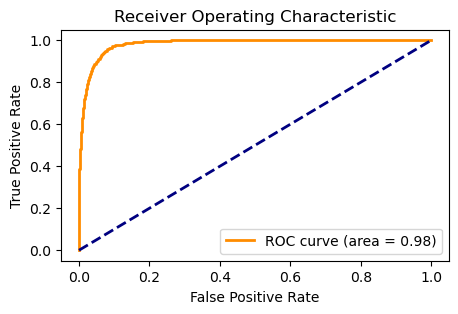

In [90]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

probabilities = model_logistic_best.predict_proba(X_test_reduced)[:,1]
roc = roc_auc_score(y_test, probabilities)
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## KS Statistics for model performance

In [91]:
probabilities = model_logistic_best.predict_proba(X_test_reduced)[:,1]
probabilities_df = pd.DataFrame({'Actual': y_test, 'Predicted_Probability': probabilities})
probabilities_df.head()

,Actual,Predicted_Probability
33553,0,0.000007
9427,0,0.747048
199,0,0.157633
12447,0,0.443662
39489,0,0.001009


In [92]:
probabilities_df.sort_values(by='Predicted_Probability', ascending=False, inplace=True)
probabilities_df.reset_index(drop=True, inplace=True)
probabilities_df['Decile'] = pd.qcut(probabilities_df.index, 10, labels=[10,9,8,7,6,5,4,3,2,1])
probabilities_df.sample(5)

,Actual,Predicted_Probability,Decile
6823,0,5.293960e-05,4
9802,0,6.428433e-08,1
8406,0,3.534983e-06,2
9871,0,4.143143e-08,1
3120,0,2.849526e-02,7


In [93]:
df_prob_grouped = probabilities_df.groupby('Decile').apply(lambda x: pd.Series({
    'Min_Prob': x['Predicted_Probability'].min(),
    'Max_Prob': x['Predicted_Probability'].max(),
    'Defaults': x['Actual'].sum(),
    'Non Defaults': len(x) - x['Actual'].sum(),
    'Default_Rate': x['Actual'].mean(),
    'Non Default Rate': 1 - x['Actual'].mean()
})).reset_index()

df_prob_grouped

C:\Users\shivangigupta\AppData\Local\Temp\1\ipykernel_11856\658183162.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_prob_grouped = probabilities_df.groupby('Decile').apply(lambda x: pd.Series({
C:\Users\shivangigupta\AppData\Local\Temp\1\ipykernel_11856\658183162.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_prob_grouped = probabilities_df.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Min_Prob,Max_Prob,Defaults,Non Defaults,Default_Rate,Non Default Rate
0,10,8.239350e-01,1.000000,716.0,284.0,0.716,0.284
1,9,2.122891e-01,0.821848,129.0,871.0,0.129,0.871
2,8,3.503417e-02,0.211954,14.0,986.0,0.014,0.986
3,7,5.712444e-03,0.035029,2.0,998.0,0.002,0.998
4,6,1.015587e-03,0.005710,0.0,1000.0,0.000,1.000
5,5,2.023453e-04,0.001015,0.0,1000.0,0.000,1.000
6,4,4.042412e-05,0.000202,0.0,1000.0,0.000,1.000
7,3,8.045283e-06,0.000040,0.0,1000.0,0.000,1.000
8,2,1.032071e-06,0.000008,0.0,1000.0,0.000,1.000
9,1,1.618191e-09,0.000001,0.0,1000.0,0.000,1.000


In [94]:
df_prob_grouped['Cumulative_Defaults'] = df_prob_grouped['Defaults'].cumsum()
df_prob_grouped['Cumulative_Non_Defaults'] = df_prob_grouped['Non Defaults'].cumsum()
df_prob_grouped['Cumulative_Default_Rate'] = df_prob_grouped['Cumulative_Defaults'] / df_prob_grouped['Defaults'].sum()
df_prob_grouped['Cumulative_Non_Default_Rate'] = df_prob_grouped['Cumulative_Non_Defaults'] / df_prob_grouped['Non Defaults'].sum()
df_prob_grouped


,Decile,Min_Prob,Max_Prob,Defaults,Non Defaults,Default_Rate,Non Default Rate,Cumulative_Defaults,Cumulative_Non_Defaults,Cumulative_Default_Rate,Cumulative_Non_Default_Rate
0,10,8.239350e-01,1.000000,716.0,284.0,0.716,0.284,716.0,284.0,0.831591,0.031076
1,9,2.122891e-01,0.821848,129.0,871.0,0.129,0.871,845.0,1155.0,0.981417,0.126381
2,8,3.503417e-02,0.211954,14.0,986.0,0.014,0.986,859.0,2141.0,0.997677,0.234271
3,7,5.712444e-03,0.035029,2.0,998.0,0.002,0.998,861.0,3139.0,1.000000,0.343473
4,6,1.015587e-03,0.005710,0.0,1000.0,0.000,1.000,861.0,4139.0,1.000000,0.452894
5,5,2.023453e-04,0.001015,0.0,1000.0,0.000,1.000,861.0,5139.0,1.000000,0.562315
6,4,4.042412e-05,0.000202,0.0,1000.0,0.000,1.000,861.0,6139.0,1.000000,0.671737
7,3,8.045283e-06,0.000040,0.0,1000.0,0.000,1.000,861.0,7139.0,1.000000,0.781158
8,2,1.032071e-06,0.000008,0.0,1000.0,0.000,1.000,861.0,8139.0,1.000000,0.890579
9,1,1.618191e-09,0.000001,0.0,1000.0,0.000,1.000,861.0,9139.0,1.000000,1.000000


In [95]:
df_prob_grouped['KS'] = df_prob_grouped['Cumulative_Default_Rate'] - df_prob_grouped['Cumulative_Non_Default_Rate']
df_prob_grouped

,Decile,Min_Prob,Max_Prob,Defaults,Non Defaults,Default_Rate,Non Default Rate,Cumulative_Defaults,Cumulative_Non_Defaults,Cumulative_Default_Rate,Cumulative_Non_Default_Rate,KS
0,10,8.239350e-01,1.000000,716.0,284.0,0.716,0.284,716.0,284.0,0.831591,0.031076,0.800516
1,9,2.122891e-01,0.821848,129.0,871.0,0.129,0.871,845.0,1155.0,0.981417,0.126381,0.855036
2,8,3.503417e-02,0.211954,14.0,986.0,0.014,0.986,859.0,2141.0,0.997677,0.234271,0.763406
3,7,5.712444e-03,0.035029,2.0,998.0,0.002,0.998,861.0,3139.0,1.000000,0.343473,0.656527
4,6,1.015587e-03,0.005710,0.0,1000.0,0.000,1.000,861.0,4139.0,1.000000,0.452894,0.547106
5,5,2.023453e-04,0.001015,0.0,1000.0,0.000,1.000,861.0,5139.0,1.000000,0.562315,0.437685
6,4,4.042412e-05,0.000202,0.0,1000.0,0.000,1.000,861.0,6139.0,1.000000,0.671737,0.328263
7,3,8.045283e-06,0.000040,0.0,1000.0,0.000,1.000,861.0,7139.0,1.000000,0.781158,0.218842
8,2,1.032071e-06,0.000008,0.0,1000.0,0.000,1.000,861.0,8139.0,1.000000,0.890579,0.109421
9,1,1.618191e-09,0.000001,0.0,1000.0,0.000,1.000,861.0,9139.0,1.000000,1.000000,0.000000


## Export the model

In [96]:
from joblib import dump

model_data = {
    'model': model_logistic_best,
    'scaler': scaler,
    'features': X_resampled1.columns,
    'cols_to_scale': num_cols
}

dump(model_data, 'artifacts/loan_default_model_logistic.joblib')

['artifacts/loan_default_model_logistic.joblib']

In [97]:
num_cols

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio',
       'del_months_loan_ratio', 'avg_dpd'],
      dtype='object')

In [98]:
X_resampled1.columns

Index(['age', 'avg_dpd', 'credit_utilization_ratio', 'del_months_loan_ratio',
       'loan_tenure_months', 'loan_to_income_ratio', 'net_disbursement',
       'number_of_open_accounts', 'loan_purpose_Education',
       'loan_purpose_Home', 'loan_purpose_Personal', 'loan_type_Unsecured',
       'residence_type_Owned', 'residence_type_Rented'],
      dtype='object')

In [108]:
prob = model_logistic_best.predict_proba(X_test_reduced[0:1])
prob[0][0], prob[0][1]


(0.9999925979821981, 7.402017801894512e-06)

In [115]:
model_logistic_best.coef_[0]

array([-8.48325987e-03,  2.00712461e+00,  1.55686786e+01,  1.31854858e+01,
        6.78006777e-01,  1.87848083e+01, -1.96441465e+00,  9.52044997e-01,
        1.02254732e+00, -3.28195096e+00,  1.09079284e+00,  1.09079284e+00,
       -1.80666948e+00,  1.91365564e+00])

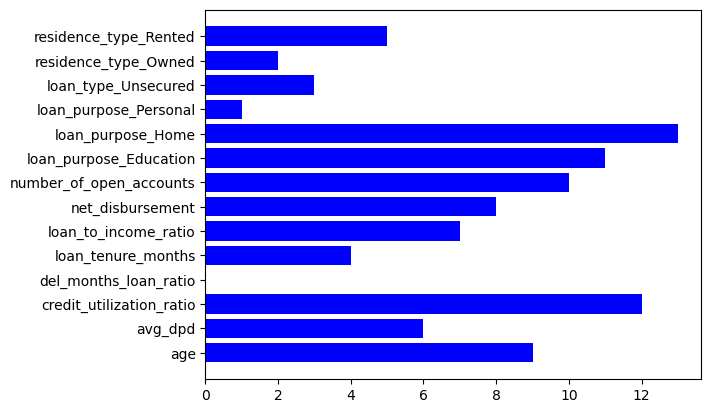

In [ ]:
plt.barh(X_resampled1.columns, np.argsort(model_logistic_best.coef_), color='blue')
plt.show()